In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# بارگذاری دیتابیس ساختگی شامل 10000 سطر
data = pd.read_excel('Book5.xlsx')

# بارگذاری دیتابیس اصلی شامل 120 سطر
data_test = pd.read_excel('Book6-testModel.xlsx')

In [31]:
# stete و action دیتابیس ساختگی جهت آموزش مدل

X = data[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]].values
# X = data[['phase','student_level']].values
y = data['task_variant'].values

In [32]:
# stete و action دیتابیس اصلی جهت تست مدل

X_test_base = data_test[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]].values
# X = data[['phase','student_level']].values
y_test_base = data_test['task_variant'].values

In [33]:
# جدا کردن داده ها به دو دسته برای اموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# استانداردسازی داده‌ها
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test_base = scaler.transform(X_test_base)

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_dim=25, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # سه خروجی برای پیش‌بینی 1، 2 یا 3
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\parspooya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 200)                 │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,203 (336.73 KB)

 Trainable params: 86,203 (336.73 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# تبدیل برچسب‌ها به one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train - 1, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test - 1, num_classes=3)

# تعریف callbacks برای EarlyStopping و ModelCheckpoint
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_dqn_model40.keras', monitor='val_loss', save_best_only=True)
]

# آموزش مدل
history = model.fit(X_train, y_train_encoded, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callbacks)

#   ذخیره مدل نهایی
model.save('dqn_model40.keras')


Epoch 1/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5632 - loss: 0.9288 - val_accuracy: 0.8281 - val_loss: 0.4328
Epoch 2/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7701 - loss: 0.5315 - val_accuracy: 0.8531 - val_loss: 0.3247
Epoch 3/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8241 - loss: 0.4220 - val_accuracy: 0.8894 - val_loss: 0.2666
Epoch 4/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8449 - loss: 0.3542 - val_accuracy: 0.9019 - val_loss: 0.2422
Epoch 5/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3180 - val_accuracy: 0.9219 - val_loss: 0.2214
Epoch 6/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3086 - val_accuracy: 0.9294 - val_loss: 0.1874
Epoch 7/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8915 - loss: 0.2719 - val_accuracy: 0.9400 - val_loss: 0.1709
Epoch 8/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.2415 - 

In [37]:
# بارگذاری و ارزیابی مدل
# برای 20 درصد جداشده دیتابیس ساختگی
loaded_model = tf.keras.models.load_model('best_dqn_model40.keras')

# پیش‌بینی با مدل بارگذاری شده
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) + 1  # تبدیل پیش‌بینی‌های one-hot به کلاس‌های 1، 2 یا 3

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 98.45%


In [38]:
# بارگذاری و ارزیابی مدل
# برای دیتابیس اصلی
loaded_model_base = tf.keras.models.load_model('best_dqn_model40.keras')

# پیش‌بینی با مدل بارگذاری شده
y_pred_base = loaded_model.predict(X_test_base)
y_pred_classes_base = np.argmax(y_pred_base, axis=1) + 1  # تبدیل پیش‌بینی‌های one-hot به کلاس‌های 1، 2 یا 3

accuracy = accuracy_score(y_test_base, y_pred_classes_base)
print(f'Accuracy: {accuracy * 100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 90.00%


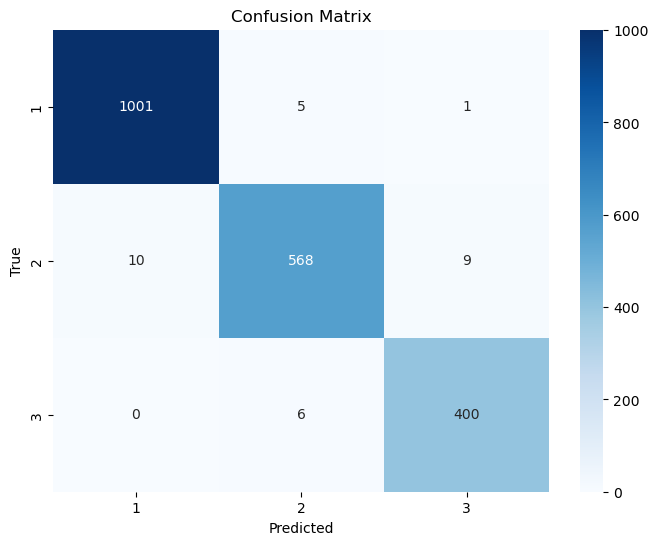

In [39]:
# ماتریس درهم‌ریختگی
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# گزارش طبقه‌بندی دیتابیس ساختگی
class_report = classification_report(y_test, y_pred_classes, target_names=['Class 1', 'Class 2', 'Class 3'])
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

     Class 1       0.99      0.99      0.99      1007
     Class 2       0.98      0.97      0.97       587
     Class 3       0.98      0.99      0.98       406

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [43]:
# گزارش طبقه‌بندی دیتابیس اصلی
class_report2 = classification_report(y_test_base, y_pred_classes_base, target_names=['Class 1', 'Class 2', 'Class 3'])
print('Classification Report:\n', class_report2)

Classification Report:
               precision    recall  f1-score   support

     Class 1       0.91      0.96      0.93        90
     Class 2       0.89      1.00      0.94        17
     Class 3       0.71      0.38      0.50        13

    accuracy                           0.90       120
   macro avg       0.84      0.78      0.79       120
weighted avg       0.89      0.90      0.89       120

